### Load the data into a Python session as Pandas DataFrame. Check if all columns are in correct type, and fix any incorrect ones if necessary

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("auto-mpg.csv")

In [3]:
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


### Split the data 75% and 25 testing

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.25, random_state=7)

### Visualize necessary columns in the data. After this point, you should have three lists

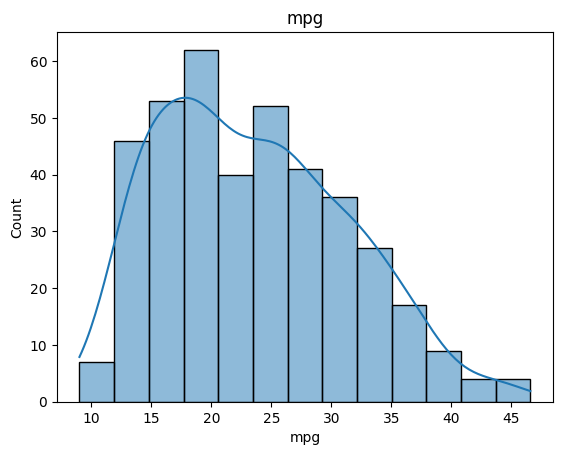

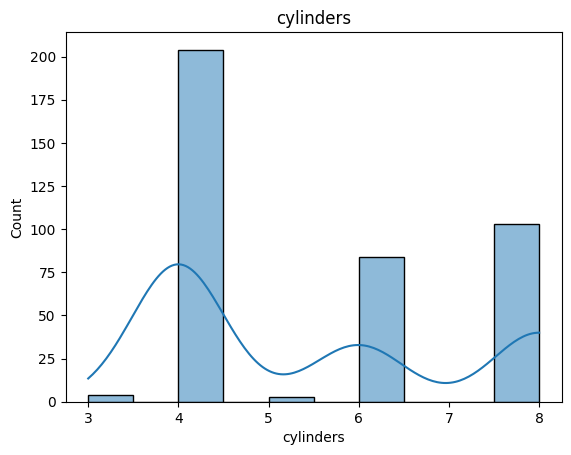

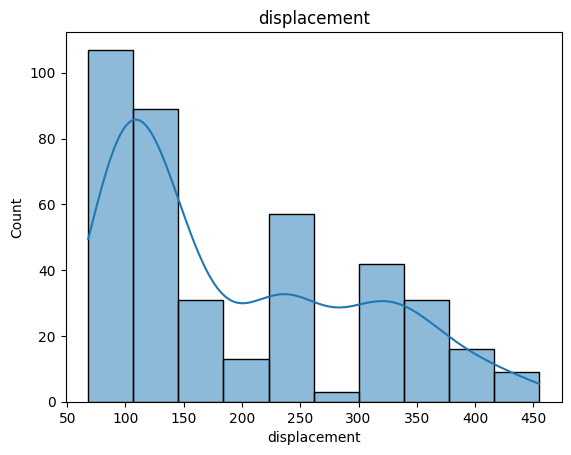

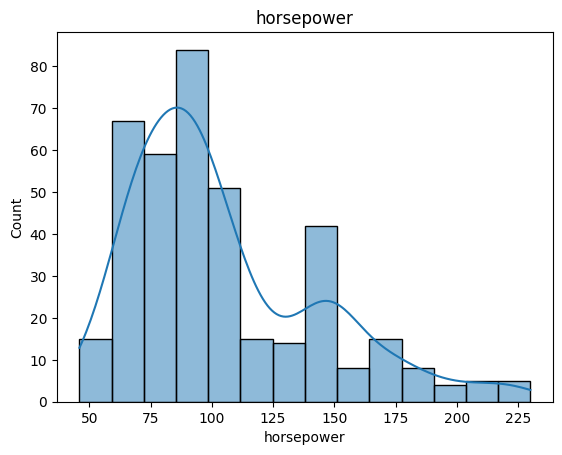

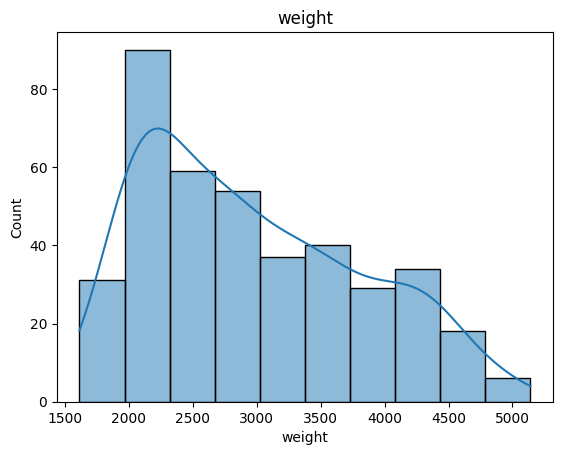

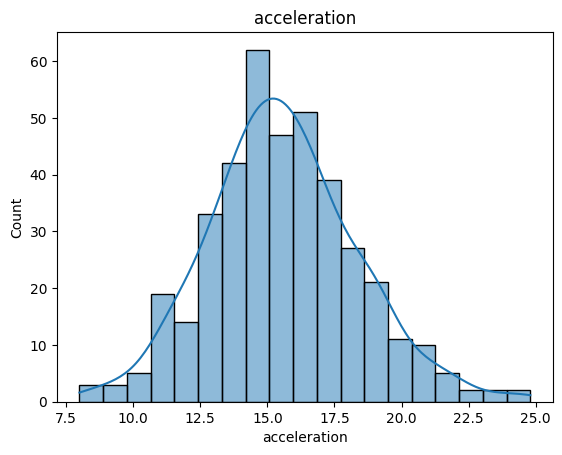

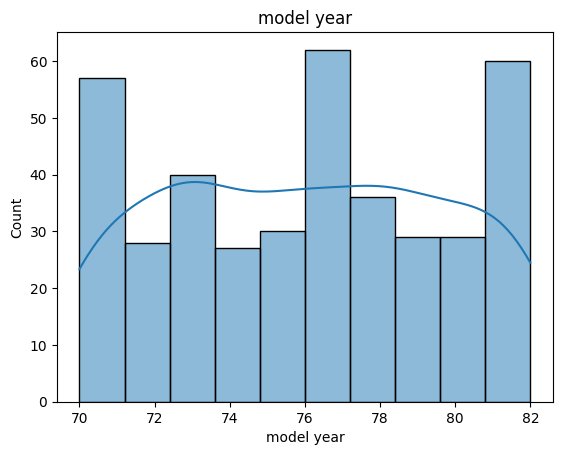

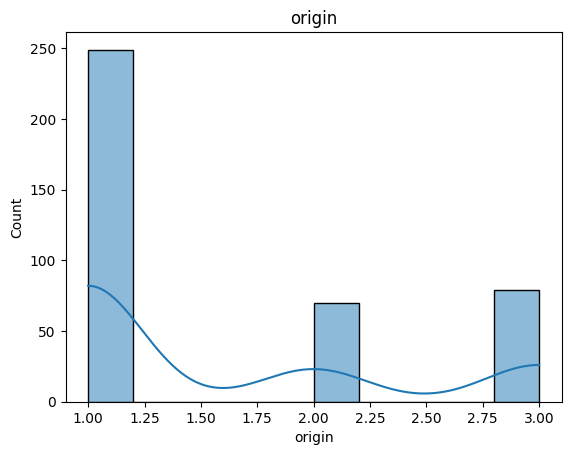

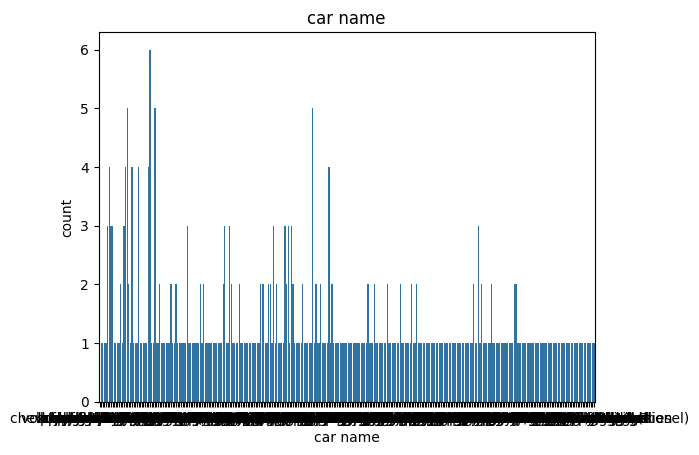

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

symmetric_column = []
skewed_column = []
categorical_column = []

for column in df.columns:
  if df[column].dtype == 'object':
    sns.countplot(data=df, x=column)
    categorical_column.append(column)
  else:
    sns.histplot(data=df, x=column, kde=True)
    if df[column].skew() < 0.5:
      symmetric_column.append(column)
    else:
      skewed_column.append(column)

  plt.title(column)
  plt.show()

### Build a pipeline

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

symmetric_pipeline = Pipeline([
  ('imputer', SimpleImputer(strategy='mean')),
  ('scaler', StandardScaler())
])

skewed_pipeline = Pipeline([
  ('imputer', SimpleImputer(strategy='mean')),
  ('log_transform', FunctionTransformer(np.log1p)),
  ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
  ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('numeric_symmetric', symmetric_pipeline, symmetric_column),
    ('numeric_skewed', skewed_pipeline, skewed_column),
    ('categorical', categorical_pipeline, categorical_column)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

### Train the pipeline on the training data. Then perform trainsformation on the training data and testing data

In [13]:
preprocessor.fit(df)
train_transformed = preprocessor.transform(train)
test_transformed = preprocessor.transform(test)

### Print the shape of the processed training data and processed testing data

In [14]:
train_transformed.shape

(298, 313)

In [15]:
test_transformed.shape

(100, 313)